<a href="https://colab.research.google.com/github/saabrinazada-web/retail-sales-analytics/blob/main/Retail_Sales_Analytics_Profitability_Drivers_and_Strategic_Insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
import numpy as np

df = pd.read_csv('superstore.csv')

# display the first five rows to obtain an initial overview of the dataset structure
df.head()

# examine concise dataset information including number of entries, column names, data types, and memory usage
df.info()

# generate descriptive statistical summary for all numerical columns
df.describe()

# identify the number of missing values in each column to assess data completeness
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [4]:
# data conversion
df['Order Date'] = pd.to_datetime(df['Order Date'])

# jumlah baris duplikat
df.duplicated().sum()

np.int64(0)

In [15]:
# group by product name and calculate total quantity sold
product_sales_volume = df.groupby('Product Name')['Quantity'].sum().reset_index()

# sort products from highest to lowest sales volume
top_products_by_quantity = product_sales_volume.sort_values(by='Quantity', ascending=False)

# display top 5 best-selling products based on quantity
print("\nTop 5 Best-Selling Products by Quantity:")
print(top_products_by_quantity.head(5))

# group by product name and calculate total profit
product_profit = df.groupby('Product Name')['Profit'].sum().reset_index()

# sort products by highest total profit
most_profitable = product_profit.sort_values(by='Profit', ascending=False)

# sort products by lowest total profit (largest losses)
most_loss_making = product_profit.sort_values(by='Profit', ascending=True)
print("\nTop 5 Loss-Making Products:")
print(most_loss_making.head(5))

# display top 5 most profitable products
print("\nTop 5 Most Profitable Products:")
print(most_profitable.head(5))

# identify products generating negative profit
loss_making_products = product_profit[product_profit['Profit'] < 0]
number_of_loss_making_products = loss_making_products['Product Name'].nunique()
print(f"\nNumber of Unique Products Generating Losses: {number_of_loss_making_products}")

# evaluate overall company performance
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()
print(f"\nTotal Company Sales: ${total_sales:,.2f}")
print(f"Total Company Profit: ${total_profit:,.2f}")

if total_profit > 0:
    print("Conclusion: The company is operating at an overall net profit position.")
elif total_profit < 0:
    print("Conclusion: The company is operating at an overall net loss position.")
else:
    print("Conclusion: The company is operating at break-even.")


Top 5 Best-Selling Products by Quantity:
                    Product Name  Quantity
1499                     Staples       215
1493             Staple envelope       170
537            Easy-staple paper       150
1500     Staples in misc. colors        86
942   KI Adjustable-Height Table        74

Top 5 Loss-Making Products:
                                          Product Name     Profit
475          Cubify CubeX 3D Printer Double Head Print -8879.9704
985          Lexmark MX611dhe Monochrome Laser Printer -4589.9730
476          Cubify CubeX 3D Printer Triple Head Print -3839.9904
425  Chromcraft Bull-Nose Wood Oval Conference Tabl... -2876.1156
376  Bush Advantage Collection Racetrack Conference... -1934.3976

Top 5 Most Profitable Products:
                                          Product Name      Profit
404              Canon imageCLASS 2200 Advanced Copier  25199.9280
650  Fellowes PB500 Electric Punch Plastic Comb Bin...   7753.0390
805               Hewlett Packard LaserJe

In [17]:
# analyze category distribution among loss-making products
loss_making_with_category = df[df['Product Name'].isin(loss_making_products['Product Name'])][['Product Name', 'Category', 'Profit']].drop_duplicates()
print("\nCategory Distribution for Loss-Making Products:")
print(loss_making_with_category['Category'].value_counts())

# calculate total unique products and proportion of loss-making products
total_unique_products = df['Product Name'].nunique()
print(f"\nTotal Unique Products in Dataset: {total_unique_products}")
print(f"Percentage of Loss-Making Products: {(number_of_loss_making_products / total_unique_products) * 100:.2f}%")

# analyze average discount for loss-making versus profitable products
# identify profitable products (profit >= 0)
profitable_products = product_profit[product_profit['Profit'] >= 0]['Product Name']

avg_discount_loss = df[df['Product Name'].isin(loss_making_products['Product Name'])]['Discount'].mean()
avg_discount_profit = df[df['Product Name'].isin(profitable_products)]['Discount'].mean()

print(f"\nAverage Discount for Loss-Making Products: {avg_discount_loss:.3f}")
print(f"Average Discount for Profitable Products: {avg_discount_profit:.3f}")

print("\nCOMPARATIVE SUMMARY")
print("\nTop 5 Best-Selling Products (by Quantity):")
print(top_products_by_quantity[['Product Name', 'Quantity']].head(5))

print("\nTop 5 Most Profitable Products (by Profit):")
print(most_profitable[['Product Name', 'Profit']].head(5))


Category Distribution for Loss-Making Products:
Category
Furniture          613
Office Supplies    596
Technology         154
Name: count, dtype: int64

Total Unique Products in Dataset: 1850
Percentage of Loss-Making Products: 16.27%

Average Discount for Loss-Making Products: 0.272
Average Discount for Profitable Products: 0.134

COMPARATIVE SUMMARY

Top 5 Best-Selling Products (by Quantity):
                    Product Name  Quantity
1499                     Staples       215
1493             Staple envelope       170
537            Easy-staple paper       150
1500     Staples in misc. colors        86
942   KI Adjustable-Height Table        74

Top 5 Most Profitable Products (by Profit):
                                          Product Name      Profit
404              Canon imageCLASS 2200 Advanced Copier  25199.9280
650  Fellowes PB500 Electric Punch Plastic Comb Bin...   7753.0390
805               Hewlett Packard LaserJet 3310 Copier   6983.8836
400                 Canon PC10

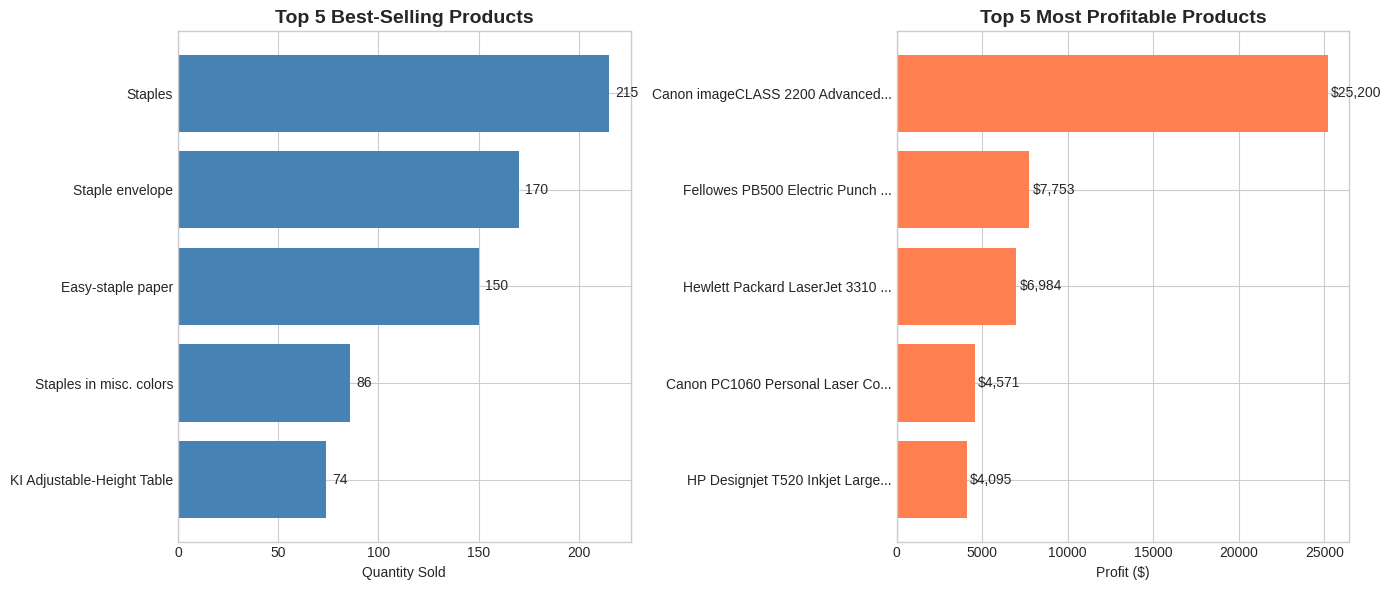

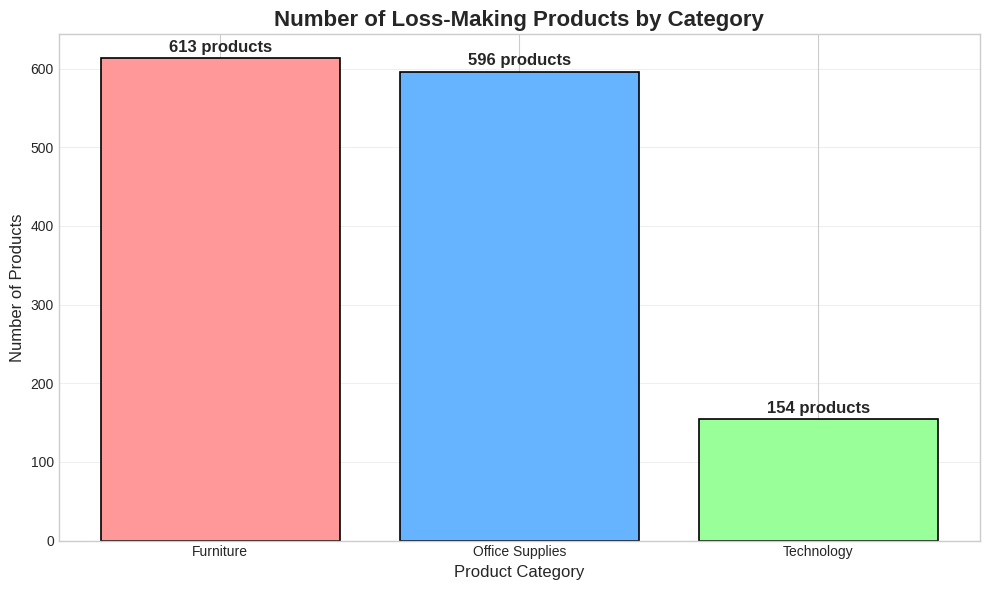

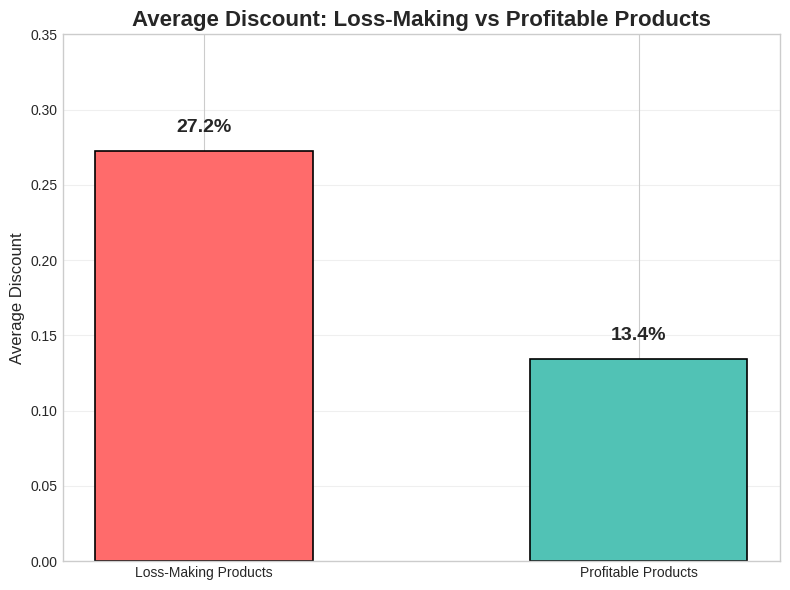

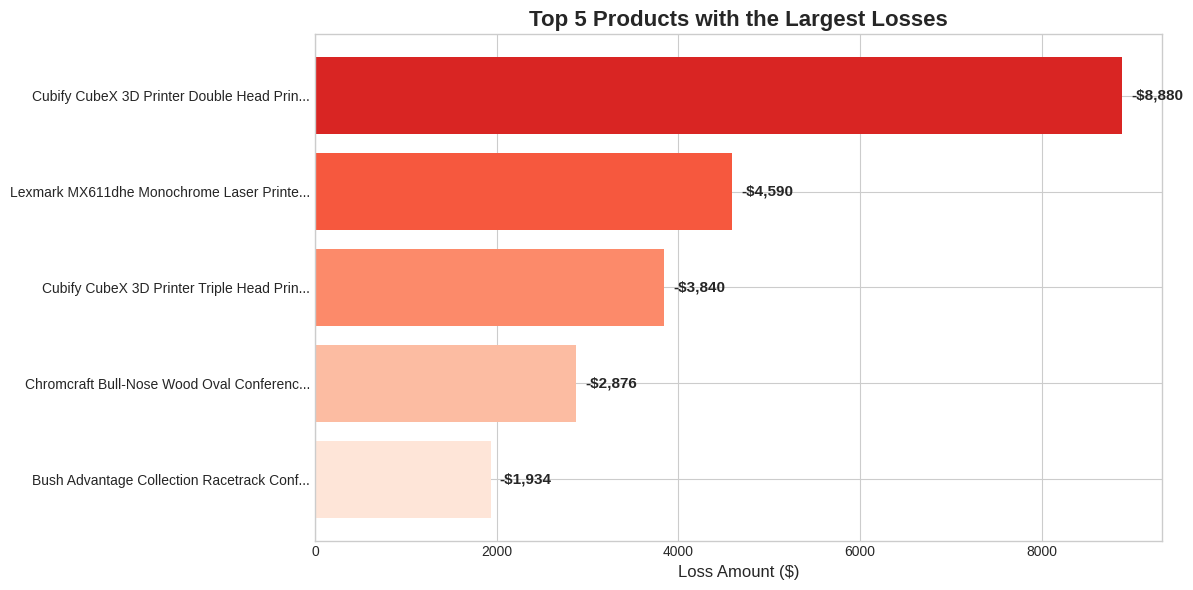

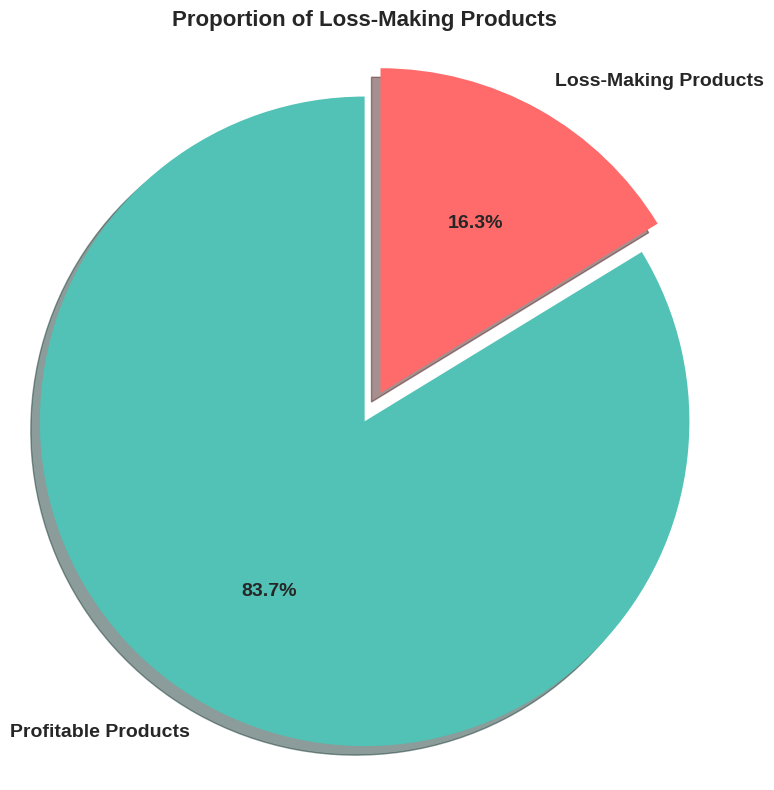

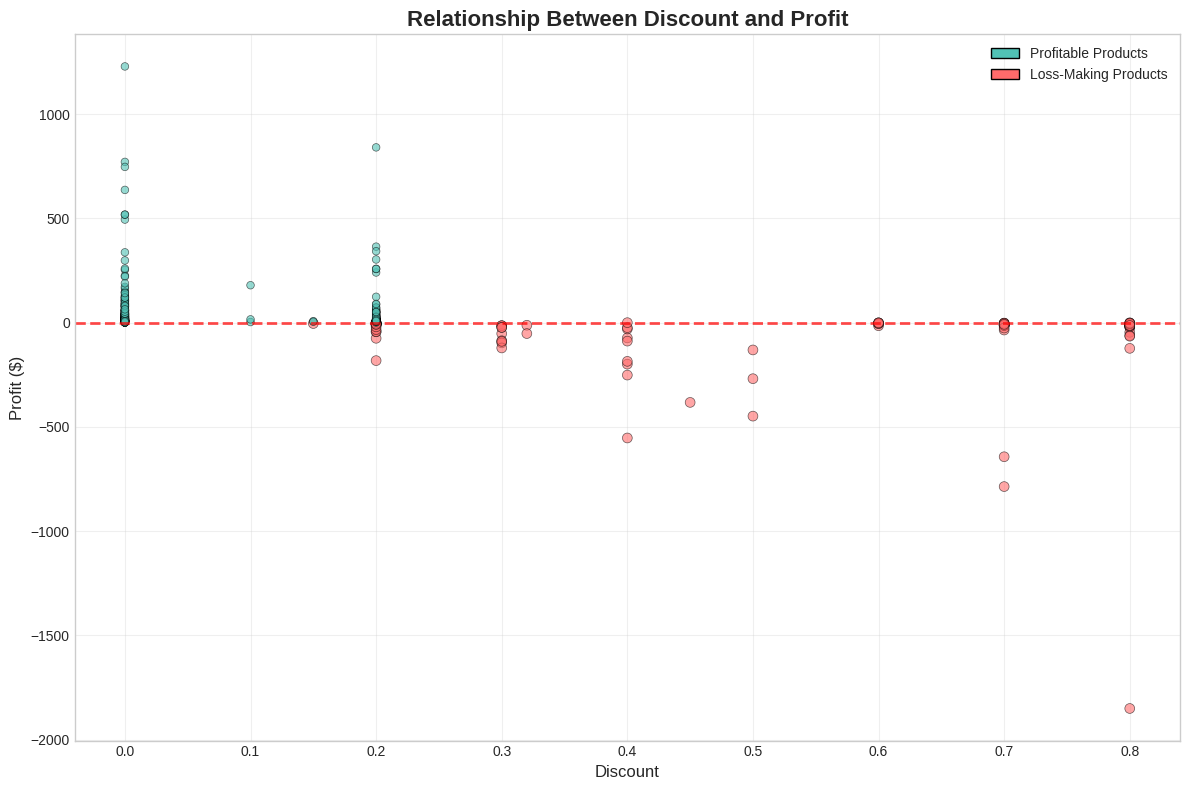

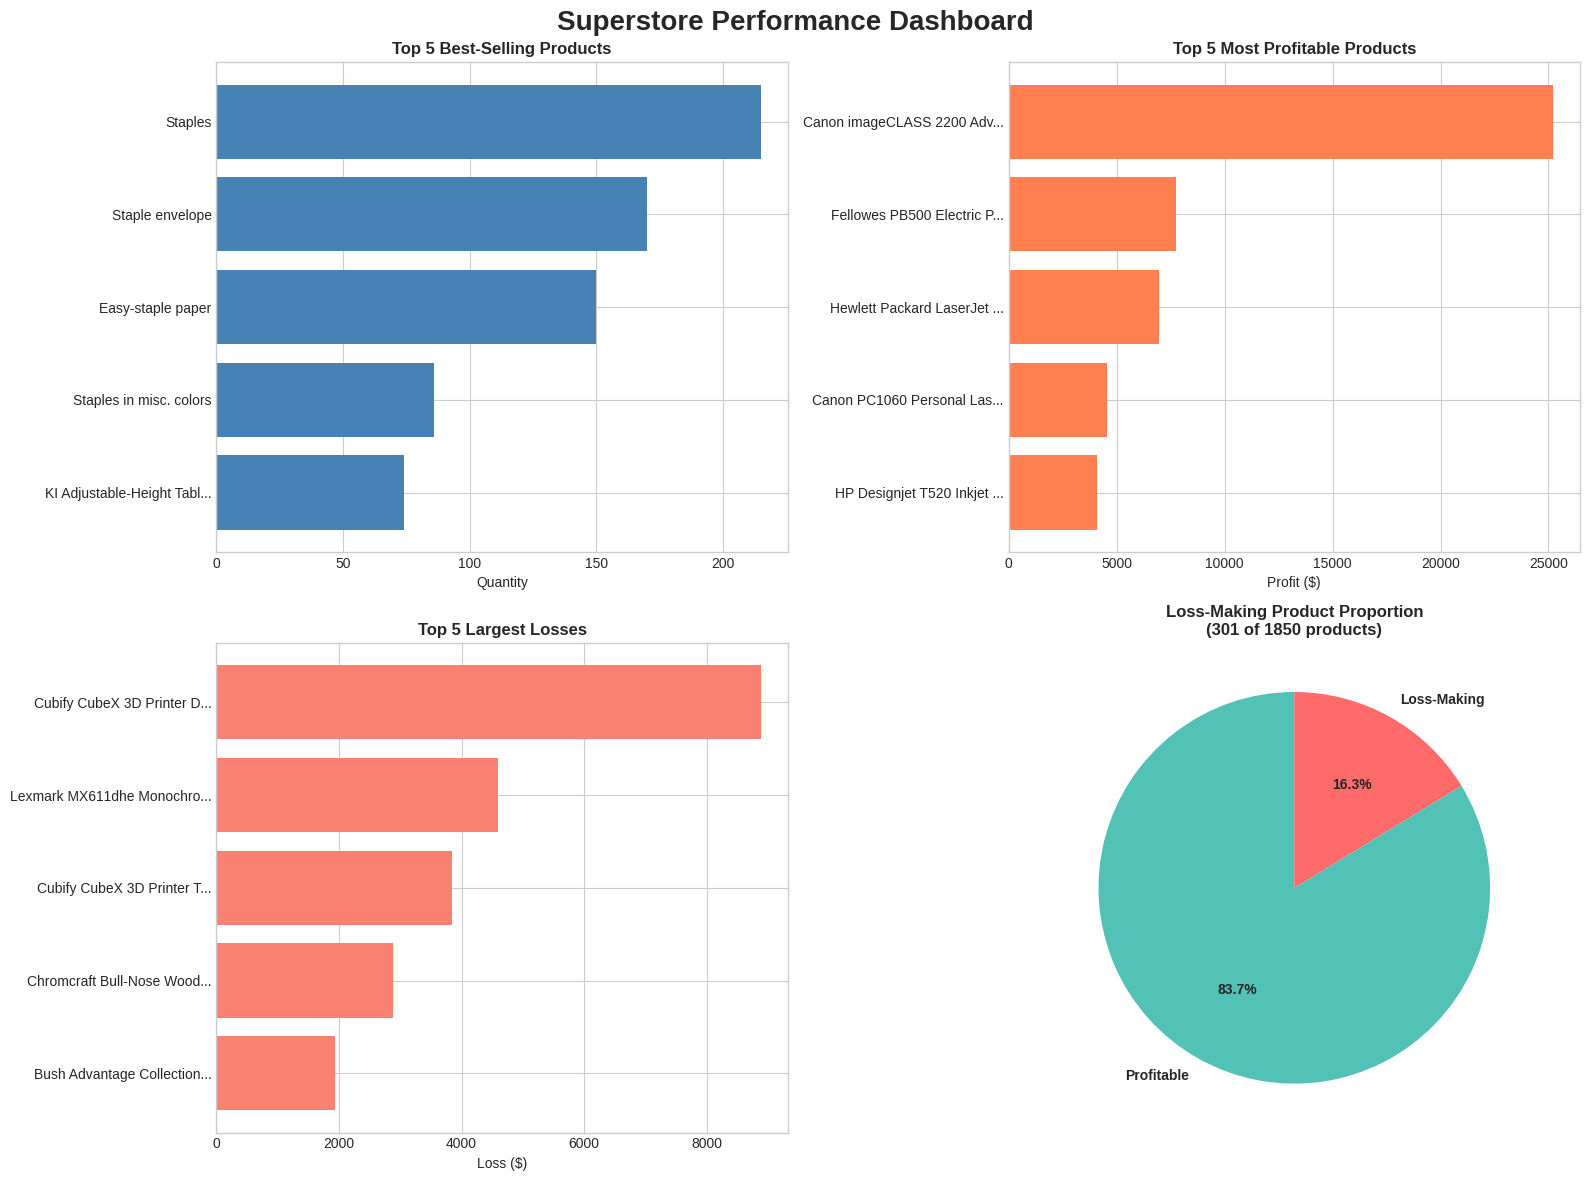

In [18]:
# visualize comparison between top 5 best-selling and top 5 most profitable products
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("Set2")

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

top5_qty = top_products_by_quantity.head(5)
bars1 = axes[0].barh(range(len(top5_qty)), top5_qty['Quantity'].values, color='steelblue')
axes[0].set_yticks(range(len(top5_qty)))
axes[0].set_yticklabels([p[:30] + '...' if len(p) > 30 else p for p in top5_qty['Product Name'].values])
axes[0].set_xlabel('Quantity Sold')
axes[0].set_title('Top 5 Best-Selling Products', fontsize=14, fontweight='bold')
axes[0].invert_yaxis()

for i, bar in enumerate(bars1):
    axes[0].text(bar.get_width() + 3, bar.get_y() + bar.get_height()/2,
                 f'{int(bar.get_width())}', va='center', fontsize=10)

top5_profit = most_profitable.head(5)
bars2 = axes[1].barh(range(len(top5_profit)), top5_profit['Profit'].values, color='coral')
axes[1].set_yticks(range(len(top5_profit)))
axes[1].set_yticklabels([p[:30] + '...' if len(p) > 30 else p for p in top5_profit['Product Name'].values])
axes[1].set_xlabel('Profit ($)')
axes[1].set_title('Top 5 Most Profitable Products', fontsize=14, fontweight='bold')
axes[1].invert_yaxis()

for i, bar in enumerate(bars2):
    axes[1].text(bar.get_width() + 200, bar.get_y() + bar.get_height()/2,
                 f'${bar.get_width():,.0f}', va='center', fontsize=10)

plt.tight_layout()
plt.show()


# visualize distribution of loss-making products by category
category_loss_count = loss_making_with_category['Category'].value_counts().reset_index()
category_loss_count.columns = ['Category', 'Count']

plt.figure(figsize=(10, 6))
colors = ['#ff9999', '#66b3ff', '#99ff99']
bars = plt.bar(category_loss_count['Category'], category_loss_count['Count'], color=colors, edgecolor='black', linewidth=1.2)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 5,
             f'{int(height)} products', ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.title('Number of Loss-Making Products by Category', fontsize=16, fontweight='bold')
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Number of Products', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


# visualize comparison of average discount between loss-making and profitable products
discount_comparison = pd.DataFrame({
    'Category': ['Loss-Making Products', 'Profitable Products'],
    'Average Discount': [avg_discount_loss, avg_discount_profit]
})

plt.figure(figsize=(8, 6))
colors = ['#ff6b6b', '#51c2b5']
bars = plt.bar(discount_comparison['Category'], discount_comparison['Average Discount'],
               color=colors, edgecolor='black', linewidth=1.2, width=0.5)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.1%}', ha='center', va='bottom', fontsize=14, fontweight='bold')

plt.title('Average Discount: Loss-Making vs Profitable Products', fontsize=16, fontweight='bold')
plt.ylabel('Average Discount', fontsize=12)
plt.ylim(0, 0.35)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


# visualize top 5 products generating the largest losses
top5_loss = most_loss_making.head(5)

plt.figure(figsize=(12, 6))
colors = plt.cm.Reds_r(np.linspace(0.3, 0.9, 5))
bars = plt.barh(range(len(top5_loss)), top5_loss['Profit'].abs().values, color=colors)

plt.yticks(range(len(top5_loss)), [p[:40] + '...' if len(p) > 40 else p for p in top5_loss['Product Name'].values])
plt.xlabel('Loss Amount ($)', fontsize=12)
plt.title('Top 5 Products with the Largest Losses', fontsize=16, fontweight='bold')

for i, bar in enumerate(bars):
    plt.text(bar.get_width() + 100, bar.get_y() + bar.get_height()/2,
             f'-${bar.get_width():,.0f}', va='center', fontsize=11, fontweight='bold')

plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


# visualize proportion of profitable vs loss-making products
labels = ['Profitable Products', 'Loss-Making Products']
sizes = [total_unique_products - number_of_loss_making_products, number_of_loss_making_products]
colors = ['#51c2b5', '#ff6b6b']
explode = (0, 0.1)

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90, textprops={'fontsize': 14, 'fontweight': 'bold'})

plt.title('Proportion of Loss-Making Products', fontsize=16, fontweight='bold')
plt.axis('equal')
plt.tight_layout()
plt.show()


# visualize relationship between discount and profit
sample_size = min(500, len(df))
df_sample = df.sample(sample_size, random_state=42)

plt.figure(figsize=(12, 8))

colors = np.where(df_sample['Profit'] >= 0, '#51c2b5', '#ff6b6b')
sizes = np.where(df_sample['Profit'] >= 0, 30, 50)

scatter = plt.scatter(df_sample['Discount'], df_sample['Profit'],
                      c=colors, s=sizes, alpha=0.6, edgecolors='black', linewidth=0.5)

plt.axhline(y=0, color='red', linestyle='--', linewidth=2, alpha=0.7)
plt.title('Relationship Between Discount and Profit', fontsize=16, fontweight='bold')
plt.xlabel('Discount', fontsize=12)
plt.ylabel('Profit ($)', fontsize=12)

from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='#51c2b5', edgecolor='black', label='Profitable Products'),
                   Patch(facecolor='#ff6b6b', edgecolor='black', label='Loss-Making Products')]
plt.legend(handles=legend_elements, loc='upper right')

plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


# build consolidated performance dashboard
fig = plt.figure(figsize=(16, 12))
fig.suptitle('Superstore Performance Dashboard', fontsize=20, fontweight='bold', y=0.98)

# subplot 1: top 5 best-selling products
ax1 = plt.subplot(2, 2, 1)
top5_qty = top_products_by_quantity.head(5)
bars1 = ax1.barh(range(len(top5_qty)), top5_qty['Quantity'].values, color='steelblue')
ax1.set_yticks(range(len(top5_qty)))
ax1.set_yticklabels([p[:25] + '...' if len(p) > 25 else p for p in top5_qty['Product Name'].values])
ax1.set_xlabel('Quantity')
ax1.set_title('Top 5 Best-Selling Products', fontweight='bold')
ax1.invert_yaxis()

# subplot 2: top 5 most profitable products
ax2 = plt.subplot(2, 2, 2)
top5_profit = most_profitable.head(5)
bars2 = ax2.barh(range(len(top5_profit)), top5_profit['Profit'].values, color='coral')
ax2.set_yticks(range(len(top5_profit)))
ax2.set_yticklabels([p[:25] + '...' if len(p) > 25 else p for p in top5_profit['Product Name'].values])
ax2.set_xlabel('Profit ($)')
ax2.set_title('Top 5 Most Profitable Products', fontweight='bold')
ax2.invert_yaxis()

# subplot 3: top 5 largest losses
ax3 = plt.subplot(2, 2, 3)
top5_loss = most_loss_making.head(5)
bars3 = ax3.barh(range(len(top5_loss)), top5_loss['Profit'].abs().values, color='salmon')
ax3.set_yticks(range(len(top5_loss)))
ax3.set_yticklabels([p[:25] + '...' if len(p) > 25 else p for p in top5_loss['Product Name'].values])
ax3.set_xlabel('Loss ($)')
ax3.set_title('Top 5 Largest Losses', fontweight='bold')
ax3.invert_yaxis()

# subplot 4: loss proportion pie chart
ax4 = plt.subplot(2, 2, 4)
labels = ['Profitable', 'Loss-Making']
sizes = [total_unique_products - number_of_loss_making_products, number_of_loss_making_products]
colors_pie = ['#51c2b5', '#ff6b6b']

ax4.pie(sizes, labels=labels, colors=colors_pie, autopct='%1.1f%%', startangle=90,
        textprops={'fontweight': 'bold'})

ax4.set_title(f'Loss-Making Product Proportion\n({number_of_loss_making_products} of {total_unique_products} products)',
              fontweight='bold')

plt.tight_layout()
plt.show()